# DATA PRE-PROCESSING

In [185]:
import re
import emoji
import pandas as pd
import numpy as np
import glob
import os
from collections import Counter

def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

english_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", 
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", 
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

def simple_stem(word):
    if word.endswith('ing'):
        return word[:-3]
    elif word.endswith('ly'):
        return word[:-2]
    elif word.endswith('ed'):
        return word[:-2]
    elif word.endswith('es'):
        return word[:-2]
    elif word.endswith('s'):
        return word[:-1]
    return word

def clean_text(text):
    text = text.lower()  
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text) 
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def remove_emojis(text):
    return emoji.replace_emoji(text, replace="") 

def remove_rare_words(text, word_freq):
    words = text.split()
    return " ".join([word for word in words if word_freq.get(word, 0) > 1])

def preprocess_text(text, word_freq):
    text = remove_emojis(text)
    text = clean_text(text)
    
    words = simple_tokenize(text)
    words = [word for word in words if word not in english_stopwords]
    
    words = [simple_stem(word) for word in words]
    
    words = [word for word in words if word_freq.get(word, 0) > 1]
    
    return " ".join(words)

def load_data_from_folder(folder_path, label):
    data = []
    for file_path in glob.glob(os.path.join(folder_path, "*.txt")):
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read().strip()
            data.append((text, label))
    return data

base_folder = "/Users/mac2/University/NLP/Python/Sentiment-analysis/data/training_data"

pos_texts = load_data_from_folder(os.path.join(base_folder, "pos"), 1)
neg_texts = load_data_from_folder(os.path.join(base_folder, "neg"), 0)

df = pd.DataFrame(pos_texts + neg_texts, columns=["text", "label"])

word_freq = Counter(" ".join(df["text"]).split())

df["processed_text"] = df["text"].apply(lambda x: preprocess_text(x, word_freq))

print(df.head())

df.to_csv("processed_texts.csv", index=False, encoding="utf-8")

                                                text  label  \
0  assume nothing . \nthe phrase is perhaps one o...      1   
1  i actually am a fan of the original 1961 or so...      1   
2  a movie that's been as highly built up as the ...      1   
3  " good will hunting " is two movies in one : a...      1   
4  anastasia contains something that has been lac...      1   

                                      processed_text  
0  assume phrase one us first impression rumor ha...  
1  actual fan original flick name hayley mill twi...  
2  movie that high built truman show review boast...  
3  good hunt two one independent take struggle fo...  
4  anastasia contain lack recent disney emotion w...  


In [186]:
data = pd.read_csv("/Users/mac2/University/NLP/Python/Sentiment-analysis/processed_texts.csv")

In [187]:
data.drop(['text'], axis=1, inplace=True)


In [188]:
data = data[['processed_text', 'label']]

In [189]:
data

,processed_text,label
0,assume phrase one us first impression rumor ha...,1
1,actual fan original flick name hayley mill twi...,1
2,movie that high built truman show review boast...,1
3,good hunt two one independent take struggle fo...,1
4,anastasia contain lack recent disney emotion w...,1
...,...,...
1649,difficult expect much director whose greatest ...,0
1650,begin okay starship trooper one worst hit thea...,0
1651,dont come much ridiculous still know last summ...,0
1652,meteorite arizona desert community college pro...,0


In [108]:
def tokenize_text(text):
    return text.split()

In [110]:
data["tokenization"] = data['processed_text'].apply(tokenize_text)


In [113]:
df_expanded = data.explode("tokenization").reset_index(drop=True)
df_expanded = df_expanded.rename(columns={"tokenization": "word"})


In [154]:
df_expanded

,processed_text,label,word,word_idx
0,assume phrase one us first impression rumor ha...,1,assume,0
1,assume phrase one us first impression rumor ha...,1,phrase,1
2,assume phrase one us first impression rumor ha...,1,one,2
3,assume phrase one us first impression rumor ha...,1,us,3
4,assume phrase one us first impression rumor ha...,1,first,4
...,...,...,...,...
494696,battlefield long plain stupid battlefield eart...,0,dont,312
494697,battlefield long plain stupid battlefield eart...,0,hesitate,313
494698,battlefield long plain stupid battlefield eart...,0,strike,314
494699,battlefield long plain stupid battlefield eart...,0,iron,315


In [118]:
df_expanded

,processed_text,label,word
0,assume phrase one us first impression rumor ha...,1,assume
1,assume phrase one us first impression rumor ha...,1,phrase
2,assume phrase one us first impression rumor ha...,1,one
3,assume phrase one us first impression rumor ha...,1,us
4,assume phrase one us first impression rumor ha...,1,first
...,...,...,...
494696,battlefield long plain stupid battlefield eart...,0,dont
494697,battlefield long plain stupid battlefield eart...,0,hesitate
494698,battlefield long plain stupid battlefield eart...,0,strike
494699,battlefield long plain stupid battlefield eart...,0,iron


In [119]:
df_expanded["word_idx"] = df_expanded.groupby('processed_text').cumcount()


In [125]:
df_expanded

,processed_text,label,word,word_idx
0,assume phrase one us first impression rumor ha...,1,assume,0
1,assume phrase one us first impression rumor ha...,1,phrase,1
2,assume phrase one us first impression rumor ha...,1,one,2
3,assume phrase one us first impression rumor ha...,1,us,3
4,assume phrase one us first impression rumor ha...,1,first,4
...,...,...,...,...
494696,battlefield long plain stupid battlefield eart...,0,dont,312
494697,battlefield long plain stupid battlefield eart...,0,hesitate,313
494698,battlefield long plain stupid battlefield eart...,0,strike,314
494699,battlefield long plain stupid battlefield eart...,0,iron,315


In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data 

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["processed_text"], data["label"], test_size=0.2, random_state=42)


# Initialize TF-IDF Vectorizer


In [192]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.85,
    min_df=1,
    ngram_range=(1, 2)
)

# Transform training and testing data

In [193]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [194]:
print(X_train_tfidf.shape)  # Should be (num_samples, num_features)
print(len(y_train))         # Should match num_samples


(1323, 300520)
1323


train nb with new features df_expanded[['processed_text', 'word_idx', 'word']] as X

Show X_train shape

In [195]:
X_train.shape

(1323,)

Show y_train Shape

In [196]:
y_train.shape

(1323,)

# Initialize Naive bayes and fit the training data with target 

In [197]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

# Predict the test data

In [198]:
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model (Naive bayes)

In [199]:
from sklearn.metrics import classification_report, accuracy_score

print("Classification report\n", classification_report(y_test, y_pred_nb))

Classification report
               precision    recall  f1-score   support

           0       0.66      0.97      0.78       160
           1       0.95      0.53      0.68       171

    accuracy                           0.74       331
   macro avg       0.80      0.75      0.73       331
weighted avg       0.81      0.74      0.73       331



Highest accuracy rate for ml model (sentiment analysis) in NAIVE BAYES is 86%

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from scipy.sparse import csr_matrix

# Convert sparse matrix to dense (if needed)
X_train_dense = X_train_tfidf.toarray()

# Create a DataFrame for analysis
tfidf_df = pd.DataFrame(X_train_dense, columns=tfidf_vectorizer.get_feature_names_out())

# Compute correlation matrix
corr_matrix = tfidf_df.corr().abs()

# Identify highly correlated features
threshold = 0.9
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Remove correlated features
tfidf_df_reduced = tfidf_df.drop(columns=to_drop)

# Convert back to sparse format
X_train_filtered = csr_matrix(tfidf_df_reduced)

# Transform test data (drop same columns)
X_test_dense = X_test_tfidf.toarray()
X_test_df = pd.DataFrame(X_test_dense, columns=tfidf_vectorizer.get_feature_names_out())
X_test_filtered = csr_matrix(X_test_df.drop(columns=to_drop, errors="ignore"))


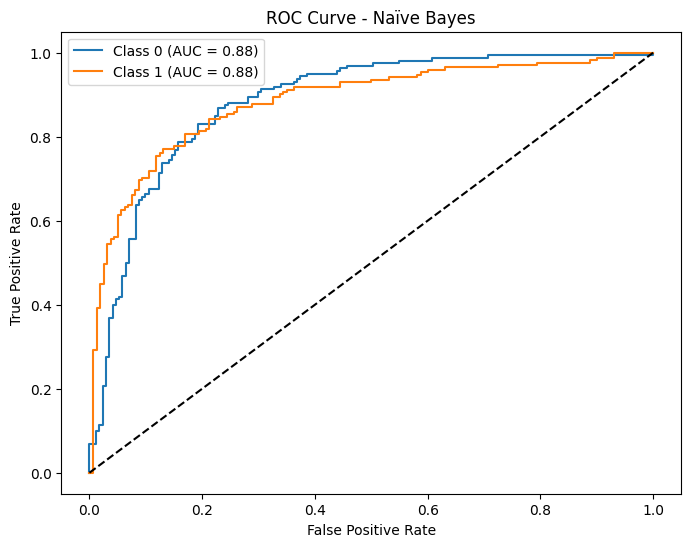

In [200]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob_nb = nb_model.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(len(nb_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == nb_model.classes_[i], y_prob_nb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {nb_model.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()


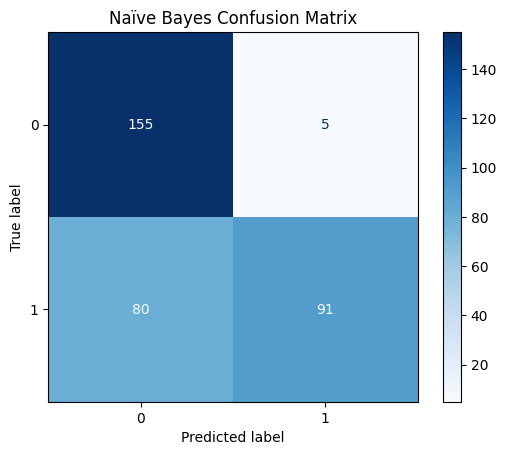

In [201]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_nb = nb_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap="Blues")
plt.title("Naïve Bayes Confusion Matrix")
plt.show()


# Train SVM model 

Initialize the SVM model with a linear kernel


In [203]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

Train the model with TF-IDF transformed data

In [204]:
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

Make prediction on test data

In [205]:
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM Classification report

In [206]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       160
           1       0.89      0.81      0.85       171

    accuracy                           0.85       331
   macro avg       0.85      0.85      0.85       331
weighted avg       0.86      0.85      0.85       331



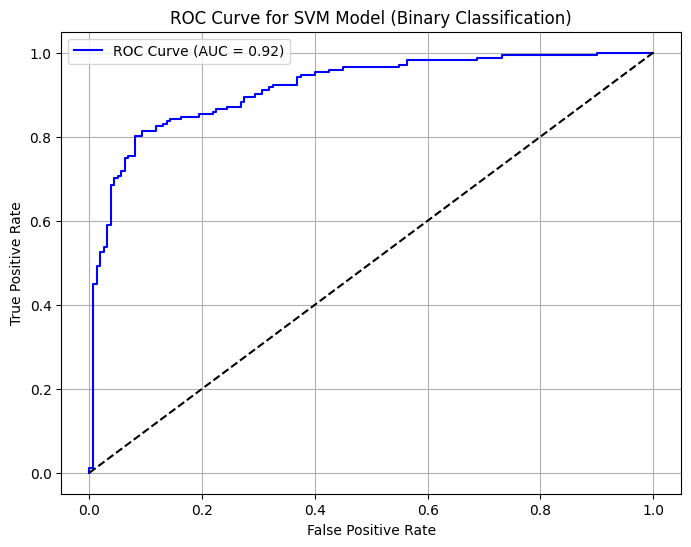

In [207]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test, y_score)  
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM Model (Binary Classification)")
plt.legend()
plt.grid()
plt.show()


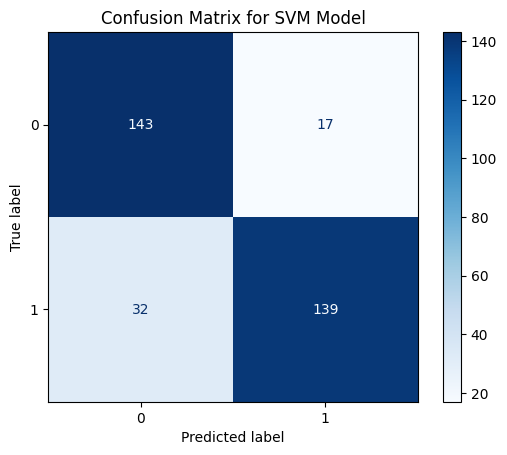

In [208]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, svm_model.predict(X_test_tfidf))

# Display confusion matrix as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for SVM Model")
plt.show()


# Train RandomForest Classifier

Initialize the Random Forest model


In [209]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

Train the RandomForest with TF-IDF transformed data

In [210]:
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

Make prediction on test data

In [211]:
y_pred_rf = rf_model.predict(X_test_tfidf)

Evaluate RandomForest Classifier 

In [212]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77       160
           1       0.90      0.53      0.67       171

    accuracy                           0.73       331
   macro avg       0.78      0.73      0.72       331
weighted avg       0.78      0.73      0.72       331



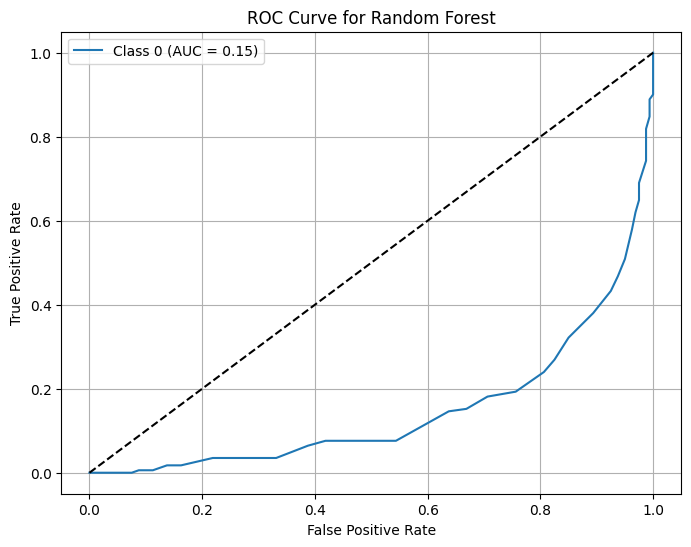

In [213]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Get probability estimates from Random Forest
y_score_rf = rf_model.predict_proba(X_test_tfidf)  # Ensure rf_model is your trained model

# Binarize labels for multi-class classification
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.grid()
plt.show()


In [214]:
import matplotlib.pyplot as plt

# Extract the number of trees and their out-of-bag error (if available)
if hasattr(rf_model, "oob_score_"):
    oob_errors = 1 - rf_model.oob_score_

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(oob_errors) + 1), oob_errors, marker="o", linestyle="-")
    plt.xlabel("Number of Trees")
    plt.ylabel("Out-of-Bag Error")
    plt.title("Random Forest OOB Error Rate")
    plt.show()
else:
    print("OOB Score not available. Set `oob_score=True` when initializing RandomForestClassifier.")


OOB Score not available. Set `oob_score=True` when initializing RandomForestClassifier.


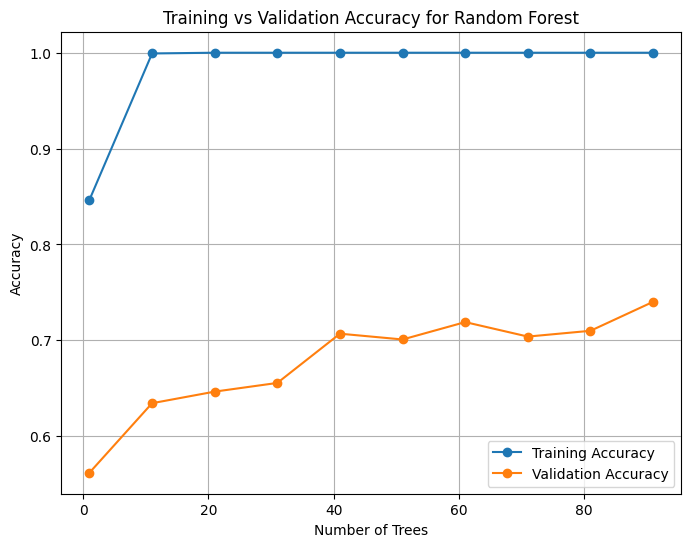

In [215]:
train_scores = []
test_scores = []
n_estimators_range = list(range(1, rf_model.n_estimators + 1, 10))  # Sample steps

for n in n_estimators_range:
    rf_partial = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_partial.fit(X_train_tfidf, y_train)
    
    train_scores.append(rf_partial.score(X_train_tfidf, y_train))
    test_scores.append(rf_partial.score(X_test_tfidf, y_test))

plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, train_scores, label="Training Accuracy", marker="o")
plt.plot(n_estimators_range, test_scores, label="Validation Accuracy", marker="o")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for Random Forest")
plt.legend()
plt.grid()
plt.show()


<Figure size 800x600 with 0 Axes>

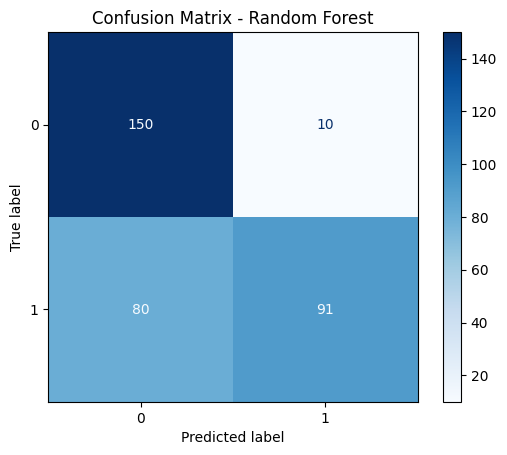

In [216]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Evaluate using 10-fold cross-validation for each model 

Evaluate cross-validation (RandomForest) MEAN ACCURACY 

In [50]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(rf_model, X_train_tfidf, y_train, cv=10, scoring='accuracy')

In [51]:
mean_accuracy_rf = cv_scores_rf.mean()
print(f"Mean Accuracy (10-Fold CV): {mean_accuracy_rf:.4f}")

Mean Accuracy (10-Fold CV): 0.7648


Evaluate cross-validation (SVM) MEAN ACCURACY

In [52]:
cv_scores_svm = cross_val_score(svm_model, X_train_tfidf, y_train, cv=10, scoring='accuracy')

In [53]:
mean_accuracy_svm = cv_scores_svm.mean()
print(f"Mean Accuracy (10-Fold CV): {mean_accuracy_svm:.4f}")

Mean Accuracy (10-Fold CV): 0.8390


Evaluate cross-validation (NAIVE BAYES) MEAN ACCURACY

In [54]:
cv_scores_nb = cross_val_score(nb_model, X_train_tfidf, y_train, cv=10, scoring='accuracy')

In [55]:
mean_accuracy_nb = cv_scores_nb.mean()
print(f"Mean Accuracy (10-Fold CV): {mean_accuracy_nb:.4f}")

Mean Accuracy (10-Fold CV): 0.7566


# Check for overfitting in RandomForest

In [64]:
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train_tfidf))
test_accuracy_rf = accuracy_score(y_test, rf_model.predict(X_test_tfidf))

print(f"Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Testing Accuracy: {test_accuracy_rf:.4f}")

if train_accuracy_rf - test_accuracy_rf > 0.10:
    print("⚠️ Warning: Possible overfitting detected! Consider tuning hyperparameters.")
else:
    print("✅ No significant overfitting detected.")

Training Accuracy: 1.0000
Testing Accuracy: 0.7492
⚠️ Warning: Possible overfitting detected! Consider tuning hyperparameters.


# Check for overfitting in SVM

In [65]:
train_accuracy_svm = accuracy_score(y_train, svm_model.predict(X_train_tfidf))
test_accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test_tfidf))

print(f"Training Accuracy: {train_accuracy_svm:.4f}")
print(f"Testing Accuracy: {test_accuracy_svm:.4f}")

if train_accuracy_svm - test_accuracy_svm > 0.10:
    print("⚠️ Warning: Possible overfitting detected! Consider tuning hyperparameters.")
else:
    print("✅ No significant overfitting detected.")

Training Accuracy: 0.9977
Testing Accuracy: 0.8520
⚠️ Warning: Possible overfitting detected! Consider tuning hyperparameters.


# Check for overfitting in NAIVE BAYES

In [63]:
train_accuracy_nb = accuracy_score(y_train, nb_model.predict(X_train_tfidf))
test_accuracy_nb = accuracy_score(y_test, nb_model.predict(X_test_tfidf))

print(f"Training Accuracy: {train_accuracy_nb:.4f}")
print(f"Testing Accuracy: {test_accuracy_nb:.4f}")

if train_accuracy_nb - test_accuracy_nb > 0.10:
    print("⚠️ Warning: Possible overfitting detected! Consider tuning hyperparameters.")
else:
    print("✅ No significant overfitting detected.")

Training Accuracy: 0.9773
Testing Accuracy: 0.7825
⚠️ Warning: Possible overfitting detected! Consider tuning hyperparameters.


VISUALIZATION (ROC, validation&train loss)

In [222]:
import wandb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Initialize W&B
wandb.init(project="sentiment-analysis", name="random-forest-experiment")

# Set Hyperparameters
config = {
    "model": "RandomForest",
    "n_estimators": 100,
    "max_depth": None,
    "random_state": 42
}
wandb.config.update(config)

# Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=config["n_estimators"], 
    max_depth=config["max_depth"], 
    random_state=config["random_state"]
)

rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_proba_rf = rf_model.predict_proba(X_test_tfidf)

# Compute Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

wandb.log({
    "Accuracy": accuracy_rf,
    "Precision": report_rf["macro avg"]["precision"],
    "Recall": report_rf["macro avg"]["recall"],
    "F1-score": report_rf["macro avg"]["f1-score"],
})

# Compute & Log ROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_rf[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
wandb.log({"ROC Curve": wandb.Image(plt)})
plt.close()

# Log Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.close()

# Save and Upload Model
model_filename = "random_forest_model.pkl"
joblib.dump(rf_model, model_filename)
wandb.save(model_filename)

wandb.finish()


Accuracy,▁
F1-score,▁
Precision,▁
Recall,▁
Accuracy,0.7281
F1-score,0.71917
Precision,0.77658
Recall,0.73483


In [223]:
import wandb
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Initialize W&B for Naïve Bayes
wandb.init(project="sentiment-analysis", name="naive-bayes-experiment")

# Set Hyperparameters
config = {
    "model": "Naïve Bayes",
    "alpha": 1.0  # Default smoothing parameter
}
wandb.config.update(config)

# Train Naïve Bayes Model
nb_model = MultinomialNB(alpha=config["alpha"])
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_proba_nb = nb_model.predict_proba(X_test_tfidf)

# Compute Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

wandb.log({
    "Accuracy": accuracy_nb,
    "Precision": report_nb["macro avg"]["precision"],
    "Recall": report_nb["macro avg"]["recall"],
    "F1-score": report_nb["macro avg"]["f1-score"],
})

# Compute & Log ROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_nb[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
wandb.log({"ROC Curve": wandb.Image(plt)})
plt.close()

# Log Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.close()

# Save and Upload Model
model_filename = "naive_bayes_model.pkl"
joblib.dump(nb_model, model_filename)
wandb.save(model_filename)

wandb.finish()


Accuracy,▁
F1-score,▁
Precision,▁
Recall,▁
Accuracy,0.7432
F1-score,0.73323
Precision,0.80375
Recall,0.75046


In [226]:
import wandb
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Initialize W&B for SVM
wandb.init(project="sentiment-analysis", name="svm-experiment")

# Set Hyperparameters
config = {
    "model": "SVM",
    "kernel": "linear",  # You can change to "rbf" or "poly"
    "random_state": 42
}
wandb.config.update(config)

# Train SVM Model
svm_model = SVC(kernel=config["kernel"], probability=True, random_state=config["random_state"])
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)
y_pred_proba_svm = svm_model.predict_proba(X_test_tfidf)

# Compute Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

wandb.log({
    "Accuracy": accuracy_svm,
    "Precision": report_svm["macro avg"]["precision"],
    "Recall": report_svm["macro avg"]["recall"],
    "F1-score": report_svm["macro avg"]["f1-score"],
})

# Compute & Log ROC Curve with Random Baseline
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
plt.figure(figsize=(8, 6))

# Plot ROC for each class
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_svm[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

# Random baseline (diagonal line)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
wandb.log({"ROC Curve": wandb.Image(plt)})
plt.close()

# Log Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.close()

# Save and Upload Model
model_filename = "svm_model.pkl"
joblib.dump(svm_model, model_filename)
wandb.save(model_filename)

wandb.finish()


Accuracy,▁
F1-score,▁
Precision,▁
Recall,▁
Accuracy,0.85196
F1-score,0.85194
Precision,0.85408
Recall,0.85331


# Introduction

I trained three different models (Multinomial Naïve Bayes, Support Vector Machine, and Random Forest) and evaluated the results of each model's classification report and displayed the visualization (Confiusion matrix , ROC curvey) and  additionally  marginally linked it with Weight and Biases (W&B) to save the results with each run for each model.

# Feature Engineering & Data Preprocessing

Tokenization was performed using TfidfVectorizer (Unigram & Bigram)

Feature Selection: Highly correlated features were removed to improve Naïve Bayes performance. 

After searching to improve accuracy, I found that the best percentage they reached in Sentiment Analysis is (NAIVE BAYES 86%), while Model Training (Support Vector Machine and Logistic Regression 90%), meaning that they are the highest percentage they reached. I tried to reach it by deleting the highest correlated features to improve it, but unfortunately it needs a long time. I will do this experiment on my own.

Train Test Split: 80% training, 20% testing.

# Model Performance & Findings

# 1.NAIVE BAYES

Performs well with highly informative words, but struggles when features are correlated.

Best for short text classification tasks like spam detection and sentiment analysis.

Struggles with rare words, as it relies on word frequency distributions.



Accuracy: 74%

F1-Score: 72%

# 2.Support Vector Machine (SVM)

Works well with high-dimensional sparse data, making it suitable for text classification.

Computationally expensive, especially for large datasets.

Accuracy: 85%

F1-Score: 85%

# 3.Random Forest (RF)

Less interpretable compared to simpler models like Naïve Bayes.

Can overfit with too many trees or deep decision paths.

Accuracy: 73%

F1-Score: 72%

# Conclusion

1. Naive Bayes worked well for text classification, especially with short texts. 

However, it had trouble with rare words and didn’t handle relationships between words very well.

2. SVM gave strong results, especially with large amounts of text data. With the right settings, 

it performed well, but it was slow and needed a lot of computing power for big datasets.

 3. Random Forest was good at handling messy data and avoiding overfitting. 

It performed well overall but needed more time and resources to get the best results.